# Visualizing Simple Graph

First, make sure everything is installed:

```
pip install torchviz
```

If you want to view the <b>dot</b> file, install `xdot`

```
sudo apt-get install graphviz
sudo apt-get install xdot
```


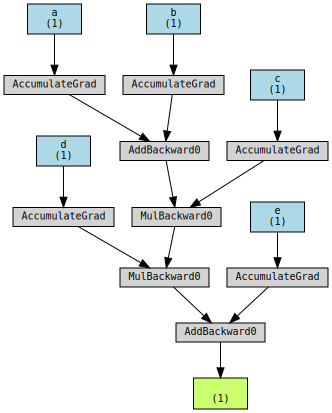

In [16]:
import torchviz
import torch
from IPython.display import display, SVG  # Import SVG display


a=torch.tensor([1.2],requires_grad=True)
b=torch.tensor([2.2],requires_grad=True)
c=torch.tensor([0.2],requires_grad=True)
d=torch.tensor([0.8],requires_grad=True)
e=torch.tensor([7.],requires_grad=True)

f=d*((a+b)*(c))+e

f.backward()

f_params={'a':a,'b':b,'c':c,'d':d,'e':e}


dot=torchviz.make_dot(f,params=f_params)

# Render as SVG and display directly in the notebook
dot.format = 'svg'
svg_string = dot.pipe().decode('utf-8')  # Get the SVG string
display(SVG(svg_string))

# Optionally, you can still save the file as well
# dot.render(filename='simple_graph', directory='../images', format='svg') #use format argument to specify the format.

# Visualizing nn.Module 


Set `show_attrs=True` and `show_saved=True` to see what `autograd` saves for the backward pass.

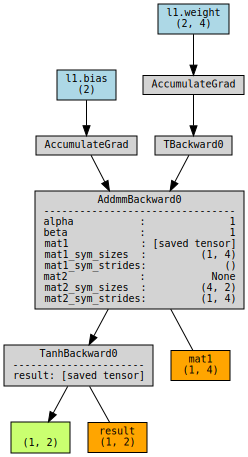

In [29]:
import torch.nn


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(in_features=4,out_features= 2, bias=True)
        return
    def forward(self, input):
        return torch.tanh(self.l1(input))

model=Net()
input=torch.randn(size=[1,4])
# print(model(input))


dot=torchviz.make_dot(model(input),params=dict(model.named_parameters()),show_attrs=True, show_saved=True )

# Render as SVG and display directly in the notebook
dot.format = 'svg'
svg_string = dot.pipe().decode('utf-8')  # Get the SVG string

display(SVG(svg_string))




# Visualizing Pre-Trained Models

In [36]:
import torchvision
from torchvision.datasets import MNIST

model=torchvision.models.resnet101(weights='DEFAULT')

input= torch.zeros(1, 3, 224, 224, dtype=torch.float, requires_grad=False)
dot=torchviz.make_dot(model(input),params=dict(model.named_parameters()))


# Render as SVG and display directly in the notebook
dot.format = 'svg'
svg_string = dot.pipe().decode('utf-8')  # Get the SVG string
#display(SVG(svg_string))
dot.render(filename='resnet101_graph', directory='../images', format='png') #use format argument to specify the format.
dot.render(filename='resnet101_graph', directory='../images', format='svg') 

'../images/resnet101_graph.svg'